In [1]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
from fastsim import simdrive, vehicle, cycle

In [3]:
def get_path(bucket, name):
    input_path = Path.cwd().parent / 'Data' / 'Cycle Data' / 'Original'
    return (input_path / bucket / name).with_suffix('.csv')

def get_cycle(path):
    t0 = time.time()
    cyc = cycle.Cycle(cyc_file_path=path)
    cyc_jit = cyc.get_numba_cyc()
    print(f'Time to load cycle: {time.time() - t0:.2e} s')
    return cyc, cyc_jit

In [4]:
cyc, cyc_jit = get_cycle(get_path('0_0','CORREDOR ACASA'))

Time to load cycle: 8.11e-01 s


In [7]:
t0 = time.time()
veh = vehicle.Vehicle(22)
veh_jit = veh.get_numba_veh()
print(f'Time to load vehicle: {time.time() - t0:.2e} s')

Time to load vehicle: 3.77e-02 s


In [17]:
t0 = time.time()
sim_drive = simdrive.SimDriveJit(cyc_jit, veh_jit)
#initSoc = 0.7935
#sim_drive.essCurKwh[0] = initSoc * sim_drive.veh.maxEssKwh
sim_drive.sim_drive() # REPLACE WITH SIMULATION OF ENERGY CONSUMPTION
print(f'Time to simulate: {time.time() - t0:.2e} s')


t0 = time.time()
sim_drive_post = simdrive.SimDrivePost(sim_drive)
output = sim_drive_post.get_output()
sim_drive_post.set_battery_wear()
diag = sim_drive_post.get_diagnostics()
print(f'Time to post process: {time.time() - t0:.2e} s')

Time to simulate: 4.00e-01 s
Time to post process: 7.74e-01 s


In [9]:
df = pd.DataFrame.from_dict(output)
df['speed'] = cyc.cycMps * 2.23694  # Convert mps to mph

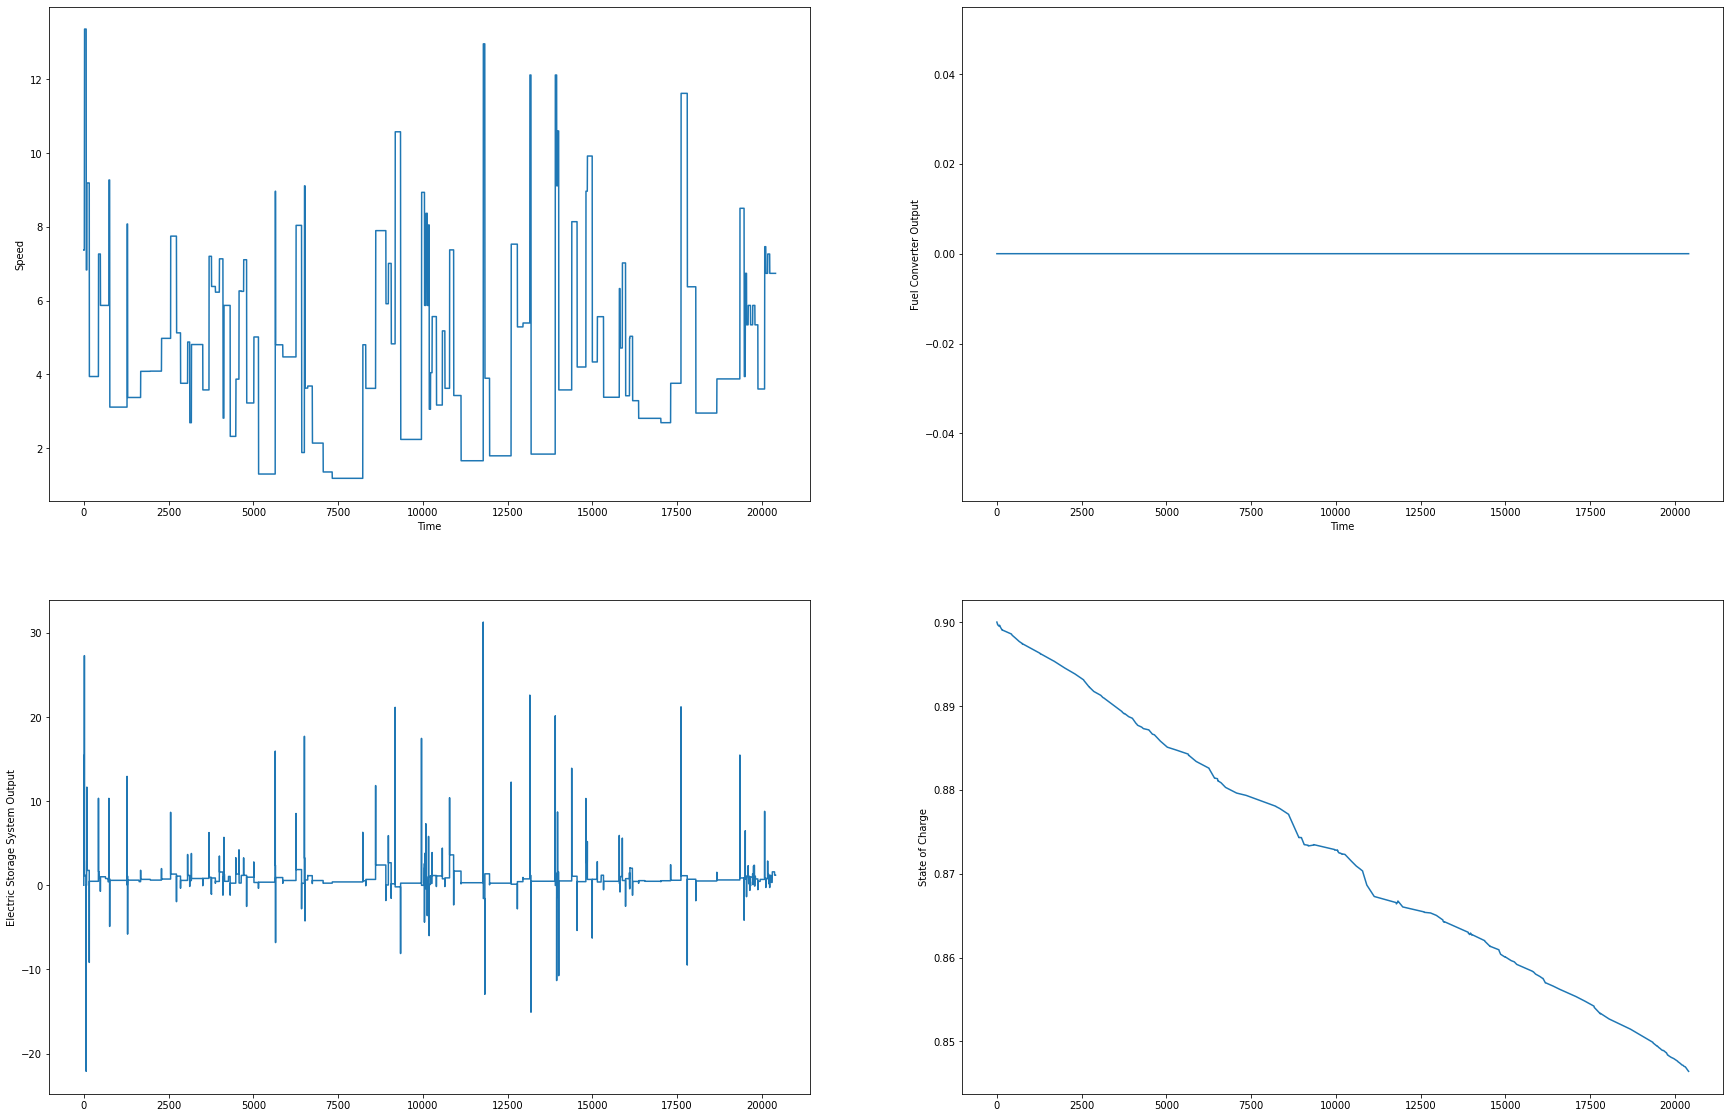

In [16]:
fig, ax = plt.subplots(2,2, figsize = (30,20))

for i in range(2):
    for j in range(2): ax[0,i].set_xlabel('Time')
    
ax[0,0].plot(df['time'],df['speed'])
ax[0,0].set_ylabel('Speed')
ax[0,1].plot(df['time'],sim_drive.fcKwOutAch)
ax[0,1].set_ylabel('Fuel Converter Output')
ax[1,0].plot(df['time'],sim_drive.essKwOutAch)
ax[1,0].set_ylabel('Electric Storage System Output')
ax[1,1].plot(df['time'],df['soc'])
ax[1,1].set_ylabel('State of Charge')
pass

In [45]:
veh.describe()

AttributeError: 'Vehicle' object has no attribute 'describe'